In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing
from sklearn import utils
%matplotlib inline


## Loading and Preprocessing Data

In [12]:
# Loading data
df_fires = pd.read_csv("../final_data.csv")

# Review the DataFrame
df_fires.head()

C:\Users\kentr\AppData\Local\Temp\ipykernel_36136\2537341630.py:2: DtypeWarning: Columns (2,3,4,13,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fires = pd.read_csv("../final_data.csv")


,FIRE_NAME,STATE,FIPS_CODE,FIRE_LATITUDE,FIRE_LONGITUDE,FIRE_DATE,CONTAIN_DATE,CLOSEST_STATION,STATION_STATE,STATION_LAT,...,ELEVATION,TAVG,TMAX,TMIN,PRCP,SNOW,SNWD,AWND,DAYS_TO_CONTAIN,FIRE_?
0,BEARPAW RIVER,AK,2068.0,63.853799,-150.87255,6/1/2020,6/10/2020,ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT,AK US,61.16916,...,38.0,118,161,67,0,0,0,47,9,1
1,RICHMOND,AK,2290.0,67.448571,-150.844029,7/10/2020,7/12/2020,FAIRBANKS INTERNATIONAL AIRPORT,AK US,64.80309,...,131.1,153,211,117,5,0,0,34,2,1
2,FLOODED LAKE,AK,2290.0,67.150722,-145.555828,6/18/2020,6/25/2020,FAIRBANKS INTERNATIONAL AIRPORT,AK US,64.80309,...,131.1,197,250,139,18,0,0,19,7,1
3,CRATER CREEK,AK,2290.0,67.094152,-146.767728,6/22/2020,6/24/2020,FAIRBANKS INTERNATIONAL AIRPORT,AK US,64.80309,...,131.1,114,117,106,8,0,0,30,2,1
4,20285 TIVEHVUN LAKE,AK,2290.0,66.9097,-145.1071,6/17/2020,8/4/2020,FAIRBANKS INTERNATIONAL AIRPORT,AK US,64.80309,...,131.1,190,244,117,0,0,0,20,48,1


In [13]:
# Review the info
df_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955138 entries, 0 to 955137
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FIRE_NAME             955138 non-null  object 
 1   STATE                 955138 non-null  object 
 2   FIPS_CODE             900319 non-null  object 
 3   FIRE_LATITUDE         955138 non-null  object 
 4   FIRE_LONGITUDE        955138 non-null  object 
 5   FIRE_DATE             955138 non-null  object 
 6   CONTAIN_DATE          819050 non-null  object 
 7   CLOSEST_STATION       955138 non-null  object 
 8   STATION_STATE         955138 non-null  object 
 9   STATION_LAT           955138 non-null  float64
 10  STATION_LON           955138 non-null  float64
 11  READINGS_DATE         955138 non-null  object 
 12  CAUSE_CLASSIFICATION  955138 non-null  object 
 13  FIRE_SIZE             955138 non-null  object 
 14  FIRE_SIZE_CLASS       955138 non-null  object 
 15  

In [14]:
# Drop Fire specific columns
df_fires.drop(["DAYS_TO_CONTAIN","CAUSE_CLASSIFICATION","FIRE_SIZE_CLASS","FIRE_SIZE","DAYS_TO_CONTAIN","FIRE_NAME","CLOSEST_STATION","STATE","CONTAIN_DATE","FIRE_DATE","READINGS_DATE","FIPS_CODE","FIRE_LATITUDE","FIRE_LONGITUDE","STATION_STATE"], axis=1, inplace=True) # ADD THESE COLUMNS after converting them to numeric

In [22]:
# Verify the categories of the "cause_classification" column
# df_fires["CAUSE_CLASSIFICATION"].value_counts()

In [23]:
# Verify the categories of the "fire_class" column
# df_fires["FIRE_SIZE_CLASS"].value_counts()

In [24]:
# Transform the cause_classification column using get_dummies
# classification_dummies = pd.get_dummies(df_fires["CAUSE_CLASSIFICATION"])

# # Display the transformed data
# classification_dummies.tail()

In [25]:
# Transform the fire_size_class column using get_dummies
# fire_size_class_dummies = pd.get_dummies(df_fires["FIRE_SIZE_CLASS"])

# # Display the transformed data
# fire_size_class_dummies.tail()

In [26]:
# Concatenate the DataFrames
# df_fires = pd.concat([df_fires, classification_dummies,fire_size_class_dummies], axis=1)

# # Drop the original column
# df_fires = df_fires.drop(columns=["CAUSE_CLASSIFICATION","FIRE_SIZE_CLASS"])

# # Display the DataFrame
# df_fires.head()

In [15]:
# Define features set
X = df_fires.copy()
X.drop(["FIRE_?"], axis=1, inplace=True) 
X.head()

,STATION_LAT,STATION_LON,ELEVATION,TAVG,TMAX,TMIN,PRCP,SNOW,SNWD,AWND
0,61.16916,-150.02771,38.0,118,161,67,0,0,0,47
1,64.80309,-147.87606,131.1,153,211,117,5,0,0,34
2,64.80309,-147.87606,131.1,197,250,139,18,0,0,19
3,64.80309,-147.87606,131.1,114,117,106,8,0,0,30
4,64.80309,-147.87606,131.1,190,244,117,0,0,0,20


In [16]:
# Define target vector
y = df_fires["FIRE_?"].ravel()

y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [17]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train

,STATION_LAT,STATION_LON,ELEVATION,TAVG,TMAX,TMIN,PRCP,SNOW,SNWD,AWND
160675,35.89227,-78.78194,120.5,193,239,72,0,0,0,41
850490,40.66747,-89.68418,199.7,114,128,61,0,0,0,20
172800,42.93998,-78.73606,216.2,34,50,11,0,0,0,32
348320,44.35904,-84.67390,350.6,23,39,-49,0,0,0,29
116579,39.13437,-108.54081,1470.4,-68,11,-121,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...
481385,43.11110,-76.10384,124.9,-51,-5,-88,0,3,0,22
495656,32.13153,-110.95638,777.6,324,417,261,0,0,0,35
235415,37.37114,-118.35886,1252.8,255,372,167,0,0,0,33
541142,35.33346,-94.36526,136.7,91,239,6,0,0,0,25


In [18]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [19]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [20]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [21]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [22]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [23]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [24]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [25]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,79411,13909
Actual 1,10972,134493


Accuracy Score : 0.8958016625834956
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     93320
           1       0.91      0.92      0.92    145465

    accuracy                           0.90    238785
   macro avg       0.89      0.89      0.89    238785
weighted avg       0.90      0.90      0.90    238785



## Feature Importance

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

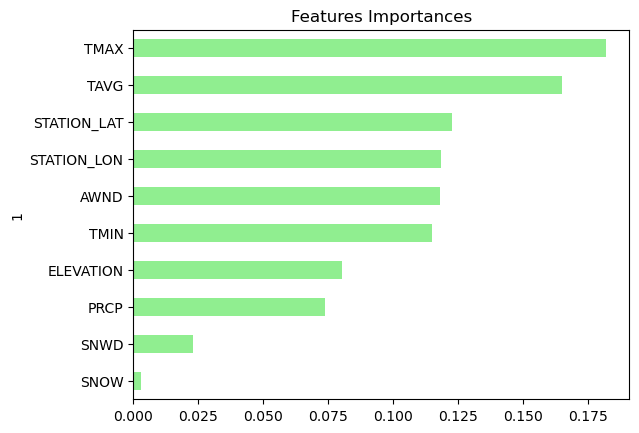

In [27]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)